In [1]:
%matplotlib inline

In [2]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [3]:
linestyles = [(0, ()), # solid 
              (0, (5, 10)),(0, (5, 5)),(0, (5, 1)), # dashed (loosely/normal/densely)
              (0, (3, 10, 1, 10)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)), # dotted  (loosely/normal/densely)
              (0, (3, 10, 1, 10, 1, 10)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)), # dashdotted(loosely/normal/densely)
              (0, (1, 10)),(0, (1, 5)),(0, (1, 1))]
couleurs = cm.Dark2.colors

# ACP sur des quelques notes

***

Nous vous proposons de travailler avec un tableau de notes de 9 élèves dans 5 matières.
Les données sont fournies dans le fichier `notes.dat`.

On travaillera donc avec une matrice de taille 9 $\times$ 5.

## Chargement des données :

In [4]:
# chargement des donnees (avec pandas)
df = pd.read_csv("notes.dat",sep='\t',index_col=0)

# un numpy array des valeurs numeriques (pour la suite)
data = df._get_numeric_data().values
nomDesVilles = list(df.index)
nomDesVariables_ = list(df)

# on met une partie des individus et des variables de cote
indice_individus = np.array(range(9))
indice_variables = np.array(range(5))

# broadcasting 
X = data[indice_individus[:,None],indice_variables] 

# List Comprehensions
nomDesVariables = [nomDesVariables_[i] for i in indice_variables]
nomDesIndividus = [nomDesVilles[i] for i in indice_individus]

print(df)

        math  phys  fran  latin  dessin
Alain    6.0   6.0   5.0    5.5     8.0
Benoit   8.0   8.0   8.0    8.0     9.0
Cyril    6.0   7.0  11.0    9.5    11.0
Daisy   14.5  14.5  15.5   15.0     8.0
Emilie  14.0  14.0  12.0   12.5    10.0
Fanny   11.0  10.0   5.5    7.0    13.0
Gaétan   5.5   7.0  14.0   11.5    10.0
Hélène  13.0  12.5   8.5    9.5    12.0
Inès     9.0   9.5  12.5   12.0    18.0


In [5]:
# nettoyage des donnees chargees
# (on ne garde que les informations associees a l'acp.)
del data, nomDesVilles, nomDesVariables_
#%whos

## Etude préliminaire et visualisation des données :

#### Moyenne pour chaque colonne/variable

In [6]:
moyennes = X.mean(axis=0)
moyennes

array([ 9.6667,  9.8333, 10.2222, 10.0556, 11.    ])

#### Ecart-type pour chaque colonne/variable 
(Chaque colonne/variable est centrée.)

In [7]:
#ecartTypes = X.std(axis=0,ddof=0)
ecartTypes = X.std(axis=0,ddof=1)
ecartTypes

array([3.5795, 3.1721, 3.6837, 2.9838, 3.1225])

#### Données centrées et données centrées-réduites 
(Chaque colonne/variable est centrée et réduite.)

In [8]:
Xc = X - moyennes
Xcr = Xc / ecartTypes
#Xcr.std(axis=0,ddof=0)
#np.size(np.cov(Xcr.T,ddof=0),1)

#### Tableau des données (utilisées dans la suite)

In [9]:
donnees = pd.DataFrame(data=Xcr, index=nomDesIndividus, columns=nomDesVariables)
donnees.columns = [str(col) + '_cr' for col in donnees.columns]
donnees

,math_cr,phys_cr,fran_cr,latin_cr,dessin_cr
Alain,-1.02436,-1.20844,-1.41767,-1.52679,-0.96077
Benoit,-0.46562,-0.57795,-0.60326,-0.68892,-0.64051
Cyril,-1.02436,-0.89319,0.21114,-0.18619,0.00000
Daisy,1.35030,1.47114,1.43275,1.65712,-0.96077
Emilie,1.21061,1.31352,0.48261,0.81925,-0.32026
Fanny,0.37250,0.05254,-1.28193,-1.02406,0.64051
Gaétan,-1.16405,-0.89319,1.02555,0.48410,-0.32026
Hélène,0.93124,0.84065,-0.46753,-0.18619,0.32026
Inès,-0.18625,-0.10508,0.61834,0.65168,2.24179


### Visualisations des données
(Les individus correspondent aux villes. Chaque individu est affiché comme une courbe. On a donc, pour chaque courbe, douze points, un pour chaque variable.)

#### Les données originales (comme dans le fichier)

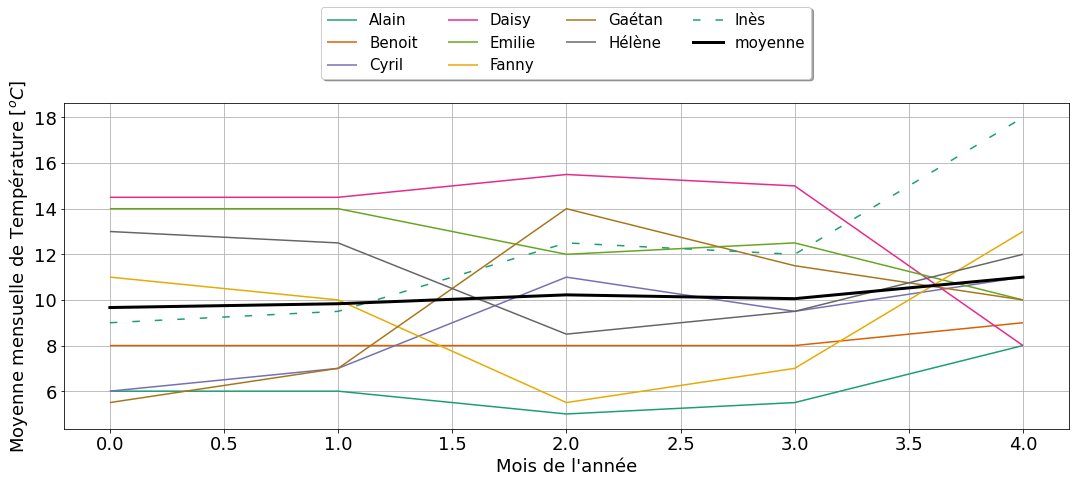

In [10]:
#la figure
for i, (ligne,label) in enumerate(zip(X, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
plt.plot(moyennes,'k-',label="moyenne",linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Mois de l'année")
plt.ylabel("Moyenne mensuelle de Température [$^oC$]") ;

#### Les données centrées (par colonne/variable)

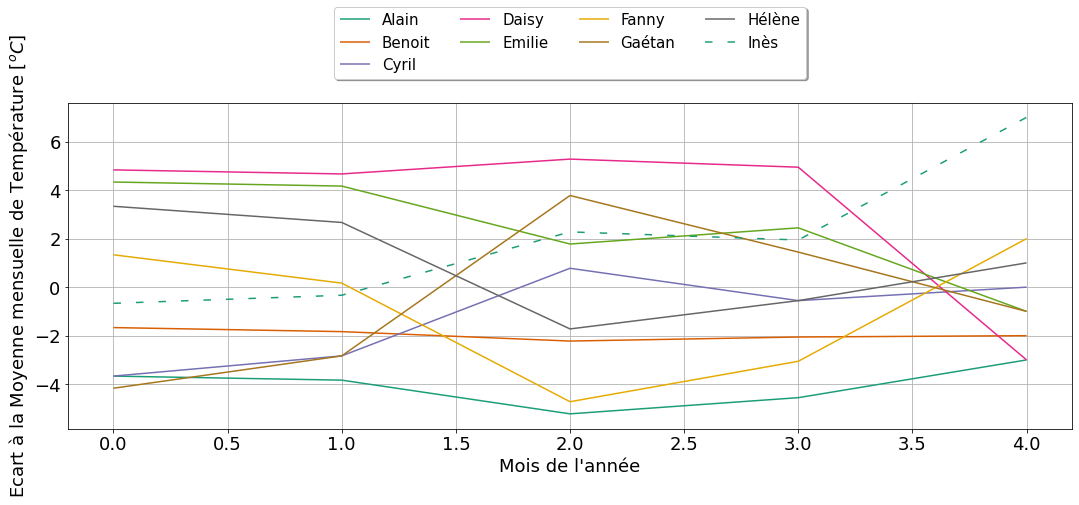

In [11]:
#la figure
for i, (ligne,label) in enumerate(zip(Xc, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Mois de l'année")
plt.ylabel("Ecart à la Moyenne mensuelle de Température [$^oC$]") ;

#### Les données centrées réduites (par colonne/variable)

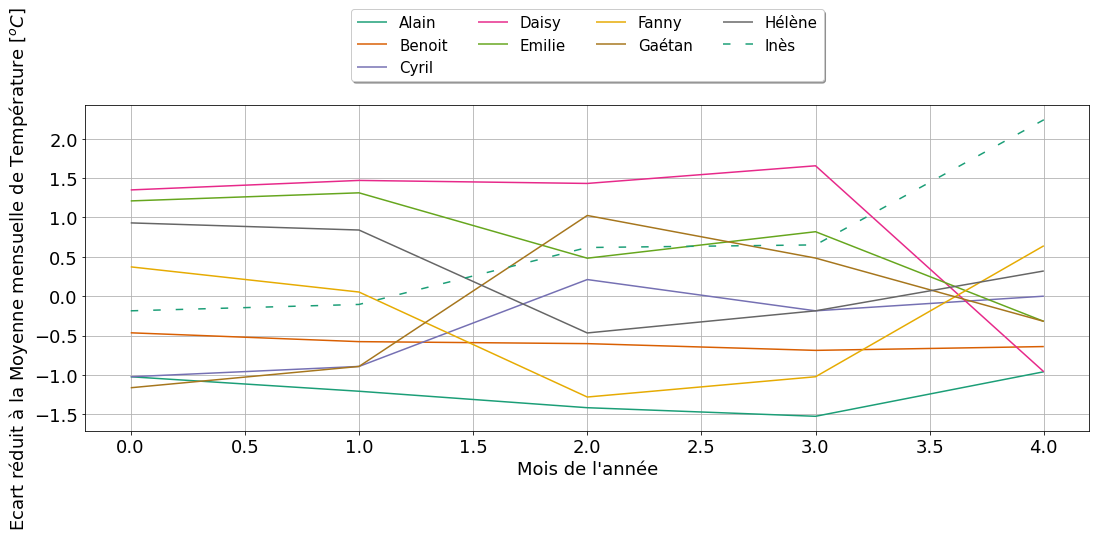

In [12]:
#la figure
for i, (ligne,label) in enumerate(zip(Xcr, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Mois de l'année")
plt.ylabel("Ecart réduit à la Moyenne mensuelle de Température [$^oC$]") ;

### Matrice de corrélations

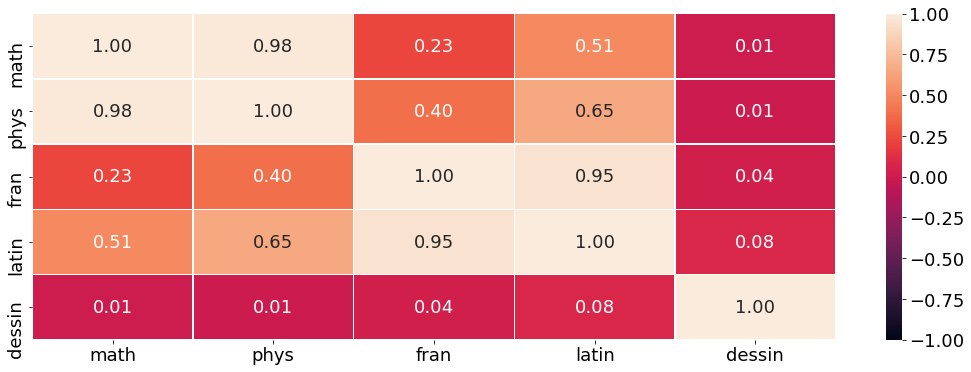

In [13]:
ax = sns.heatmap(df.iloc[indice_individus,indice_variables].corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

### Diagrammes de dispersion

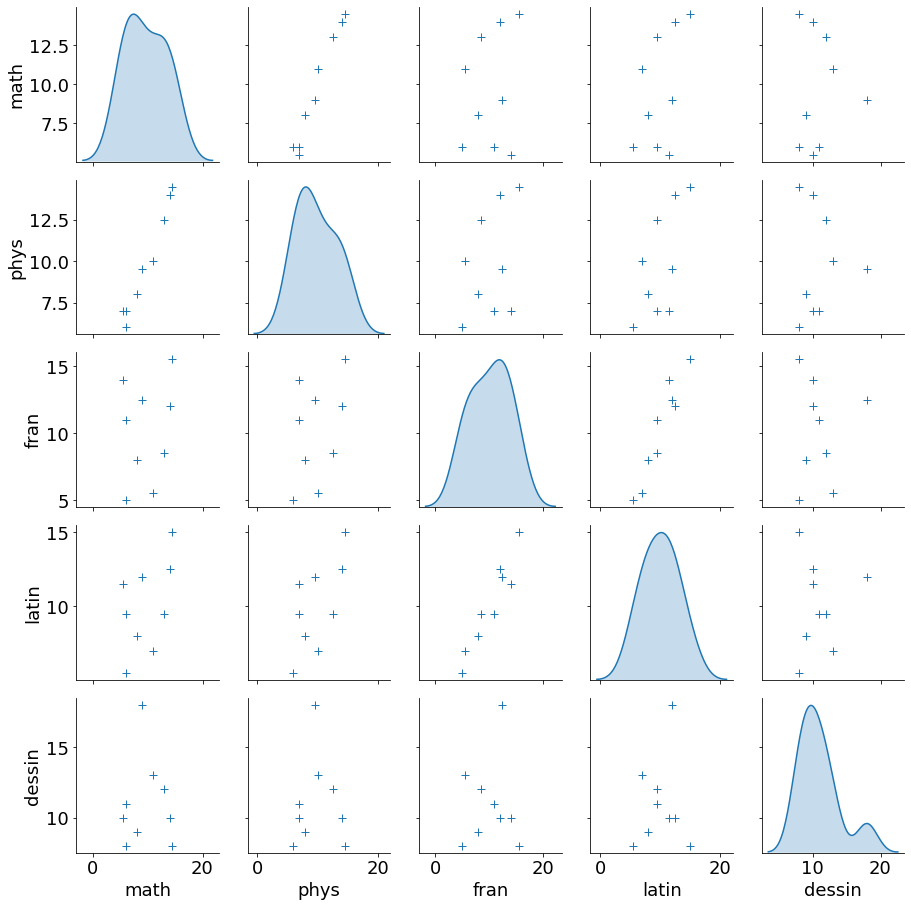

In [14]:
g = sns.pairplot(df.iloc[indice_individus,indice_variables], diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                  diag_kws=dict(shade=True))

## Réalisation de l'ACP :

In [15]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(Xcr)
    lesNouvellesCoordonnees = acp.fit_transform(Xcr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, index=nomDesIndividus, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

,CP_1,CP_2,CP_3,CP_4,CP_5
Alain,-2.61990,-0.65312,-0.69256,-0.04814,0.03426
Benoit,-1.19257,-0.32430,-0.52083,-0.02785,-0.01331
Cyril,-0.97036,0.95013,-0.28115,0.05422,-0.00484
Daisy,2.92151,-0.17450,-1.06774,-0.05265,-0.03086
Emilie,1.92050,-0.68705,-0.18351,0.01980,0.05611
Fanny,-0.89258,-1.12542,1.08563,-0.00604,-0.04405
Gaétan,-0.32545,1.63510,-0.87205,0.03696,-0.01216
Hélène,0.59490,-1.06133,0.66609,0.07553,-0.00190
Inès,0.56396,1.44048,1.86612,-0.05182,0.01675


### Valeurs propres et vecteurs propres :

In [16]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(X,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [4.8  3.01 2.81 0.14 0.09]
 * inerties des axes/facteurs (ordonnées) :
 [2.30e+01 9.08e+00 7.87e+00 1.90e-02 7.85e-03]
 * variance des axes/facteurs (ordonnées) :
 [2.88e+00 1.13e+00 9.84e-01 2.37e-03 9.81e-04]
 * vecteurs propres :
    v_1  : [0.48 0.53 0.44 0.54 0.04]
    v_2  : [-0.53 -0.4   0.58  0.36  0.32]
    v_3  : [ 0.16  0.1  -0.23 -0.11  0.95]
    v_4  : [-0.3   0.53  0.47 -0.64  0.03]
    v_5  : [-0.61  0.52 -0.44  0.39 -0.01]


### Variances et inerties des axes : 

#### Quelques considérations liant sklearn et le cours

In [17]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(Xcr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(Xcr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[2.88e+00 1.13e+00 9.84e-01 2.37e-03 9.81e-04]  (facteurs)
[1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 5.000000000000001  (facteurs)
 - 5.0  (donnees)


#### Quelques considérations propre à sklearn

In [18]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[2.30e+01 9.08e+00 7.87e+00 1.90e-02 7.85e-03] (methode 1)
[2.30e+01 9.08e+00 7.87e+00 1.90e-02 7.85e-03] (methode 2)
inertie totale :
40.00000000000001 (methode 1)
40.00000000000001 (methode 2)
pourcentages d'inertie :
 [ 57.565  22.696  19.672   0.047   0.020]
pourcentages d'inertie (cumules) :
 [ 57.565  80.261  99.933  99.980  100.000]


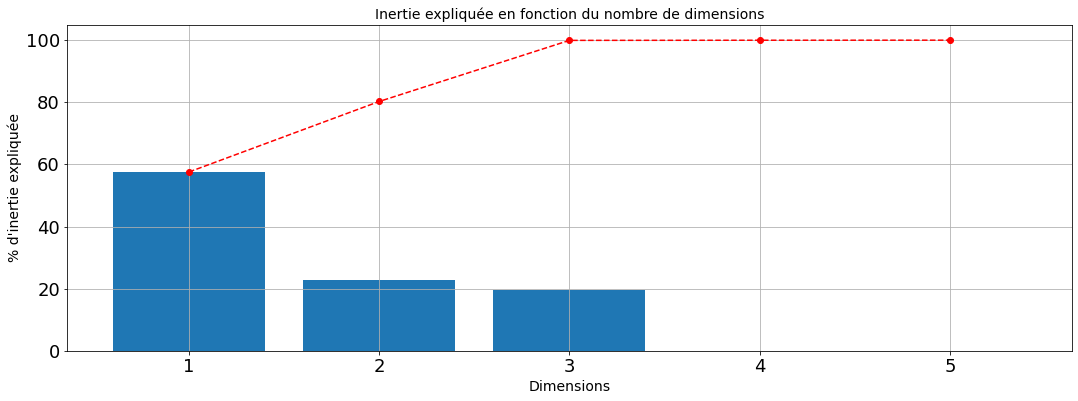

In [19]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

#### Nombre de dimensions à conserver pour garder 95% de l'inertie ou au-delà :

In [20]:
# nombres de dimensions
pourcentageDInertieSeuil = 80
pourcentageDInertieSeuil = 90
d = np.argmax(np.cumsum(acp.explained_variance_ratio_)>=pourcentageDInertieSeuil/100)+1
print("Nombres de dimensions (>={:.1f}% inertie) : ".format(pourcentageDInertieSeuil),d)

Nombres de dimensions (>=90.0% inertie) :  3


### Qualité de la représentation des individus (sur les nouveaux axes) en % :  
(ratio entre l'inertie de l'individu sur l'axe et l'inertie totale de l'individu)

In [21]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, index=nomDesIndividus, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

,CP_1,CP_2,CP_3,CP_4,CP_5
Alain,88.29746,5.48746,6.17016,0.02982,0.01510
Benoit,79.02943,5.84418,15.07345,0.04309,0.00985
Cyril,48.88001,46.86293,4.10323,0.15262,0.00122
Daisy,87.90618,0.31361,11.74185,0.02855,0.00981
Emilie,87.86797,11.24540,0.80227,0.00934,0.07501
Fanny,24.56066,39.04526,36.33314,0.00113,0.05981
Gaétan,2.99071,75.49312,21.47342,0.03857,0.00418
Hélène,18.33990,58.37219,22.99209,0.29563,0.00019
Inès,5.41040,35.29855,59.24059,0.04569,0.00477


###### La vérification associée

In [22]:
qualite.sum(axis=1)

Alain     1.0
Benoit    1.0
Cyril     1.0
Daisy     1.0
Emilie    1.0
Fanny     1.0
Gaétan    1.0
Hélène    1.0
Inès      1.0
dtype: float64

### Contribution des individus (aux nouveaux axes) en % :  
(ratio entre l'inertie de l'individu sur l'axe et l'inertie totale de l'axe)

In [23]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, index=nomDesIndividus, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100

,CP_1,CP_2,CP_3,CP_4,CP_5
Alain,29.80947,4.69869,6.09547,12.20573,14.95684
Benoit,6.17665,1.15848,3.44732,4.08365,2.25825
Cyril,4.08935,9.94381,1.00451,15.48131,0.29828
Daisy,37.06804,0.33541,14.48841,14.59738,12.13761
Emilie,16.01817,5.19945,0.42797,2.06355,40.12209
Fanny,3.46006,13.95120,14.97788,0.19220,24.72190
Gaétan,0.45998,29.44938,9.66438,7.19339,1.88504
Hélène,1.53701,12.40752,5.63847,30.04073,0.04590
Inès,1.38126,22.85607,44.25559,14.14206,3.57409


###### La vérification associée

In [24]:
contribution.sum(axis=0)

CP_1    1.0
CP_2    1.0
CP_3    1.0
CP_4    1.0
CP_5    1.0
dtype: float64

### Corrélations entre anciennes et nouvelles variables
(Cela correspond à la projection des anciennes variables dans la nouvelle base.)

#### Détermination des coordonnées des variables sur les nouveaux axes :

In [25]:
corrOldNew = np.corrcoef(X.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

,CP_1,CP_2,CP_3,CP_4,CP_5
math,0.81035,-0.56321,0.15985,-0.01455,-0.01923
phys,0.90089,-0.42176,0.09793,0.02566,0.01640
fran,0.75318,0.61569,-0.23005,0.02286,-0.01383
latin,0.91585,0.38395,-0.11255,-0.03128,0.01228
dessin,0.06236,0.33651,0.93961,0.00165,-0.00035


#### Interprétation du nouveau système de coordonnées :  
C'est à partir des coordonnées des anciennes variables dans le nouveau référentiel que l'on va pouvoir interpréter les nouveaux axes. 
(Ce sont les valeurs du tableau ci-dessus qui serviront pour représenter le nuage des variables.)

##### Qualité de la représentation des variables dans le nouveau système de coordonnées en % :

In [26]:
qualVar = coordonneesDesVariables**2
qualVar*100

,CP_1,CP_2,CP_3,CP_4,CP_5
math,65.66596,31.72076,2.55511,0.02118,0.03700
phys,81.16044,17.78775,0.95909,0.06583,0.02690
fran,56.72837,37.90792,5.29232,0.05227,0.01911
latin,83.87894,14.74138,1.26678,0.09782,0.01508
dessin,0.38885,11.32366,88.28720,0.00027,0.00001


###### La vérification associée

In [27]:
qualVar.sum(axis=1)

math      1.0
phys      1.0
fran      1.0
latin     1.0
dessin    1.0
dtype: float64

##### Contribution des variables aux différents axes du nouveau système de coordonnées en % :

In [28]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

,CP_1,CP_2,CP_3,CP_4,CP_5
math,22.81474,27.95237,2.59770,8.92180,37.71339
phys,28.19808,15.67458,0.97508,27.73142,27.42084
fran,19.70949,33.40450,5.38054,22.02167,19.48379
latin,29.14259,12.99012,1.28789,41.21001,15.36939
dessin,0.13510,9.97843,89.75880,0.11510,0.01258


###### La vérification associée

In [29]:
contrVar.sum(axis=0)

CP_1    1.0
CP_2    1.0
CP_3    1.0
CP_4    1.0
CP_5    1.0
dtype: float64

### Représentation des variables dans différents plans factoriels (nuage des variables)
Il s'agit de la projection des anciennes Variables dans différents plans factoriels (i.e. dans le nouveau système de coordonnées et donc en fonction des nouvelles variables)

(basée sur la corrélation entre les nouvelles et les anciennes variables)

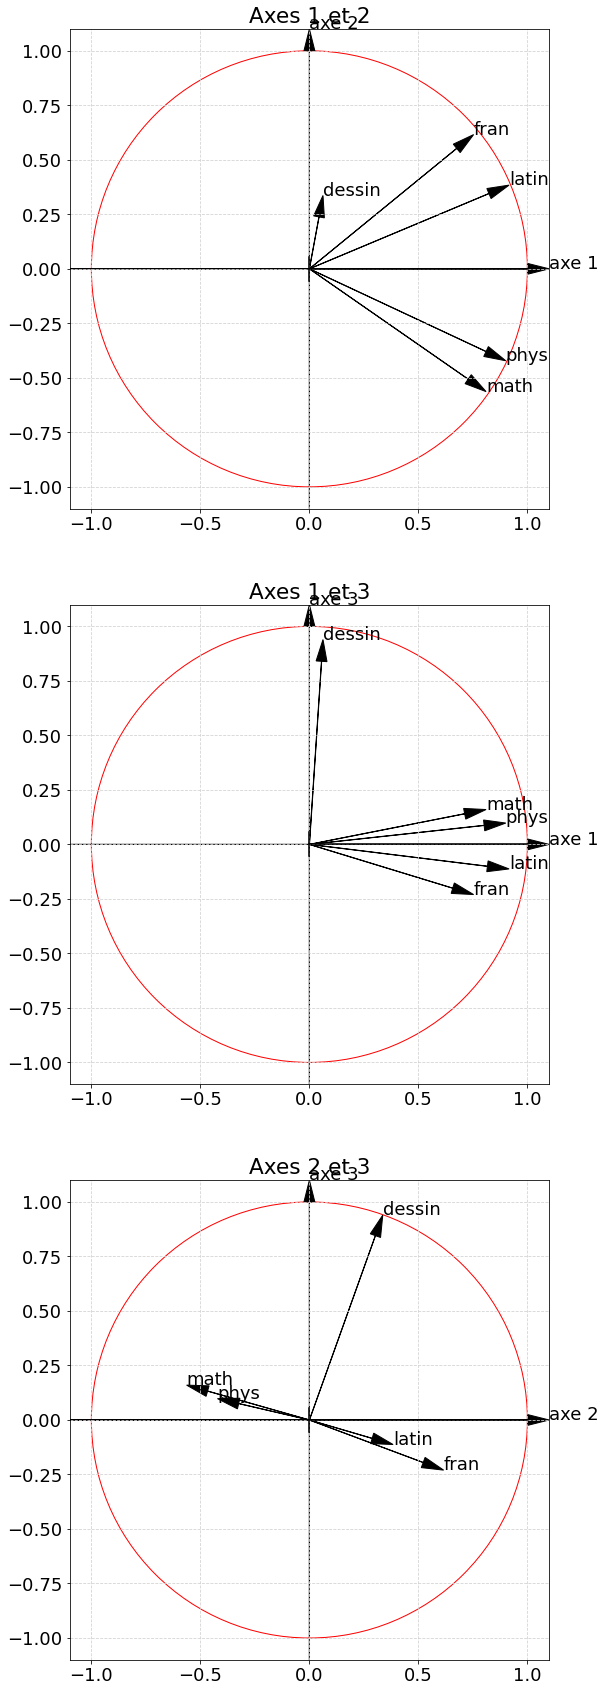

In [30]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')
        

### Représentation du nuage des individus (nouvelles coordonnées) :

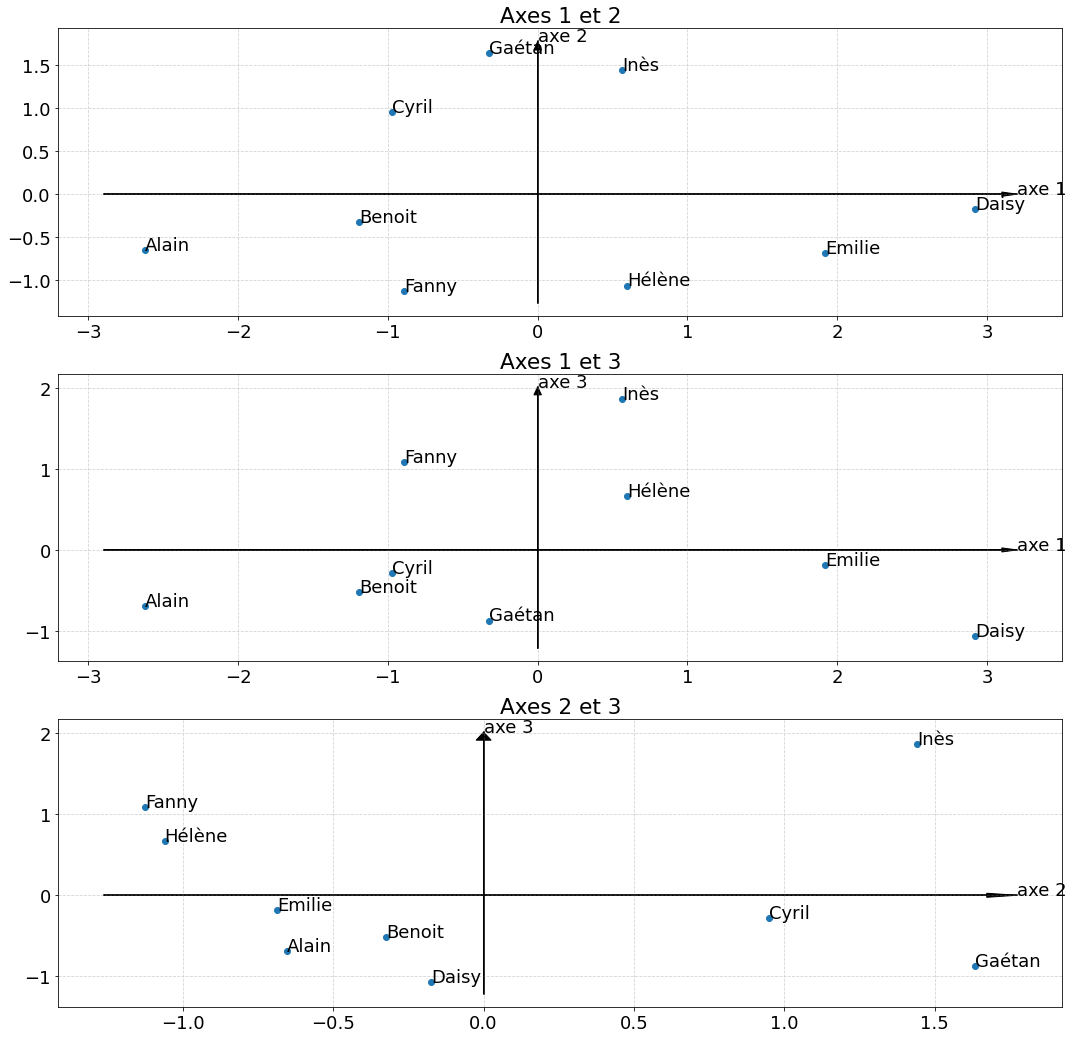

In [31]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividus) != 0 :
            for k in  range(len(nomDesIndividus)):
                plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], nomDesIndividus[k])#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))


### Reconstruction des données à partir d'une partie des composantes :

#### Les données reconstruites

In [32]:
# on reprend l'acp en limitant le nombre de facteurs
acp_ = PCA(n_components=d)
acp_.fit(Xcr)
# on determine le Xcr reconsrtuit a partir d'un nombre reduit de composantes de l'acp
Xcr_ = acp_.fit_transform(Xcr).dot(acp_.components_)+acp_.mean_
# et on en deduit le X reconstruit
X_ = Xcr_*ecartTypes+moyennes
X_= pd.DataFrame(data=X_, index=nomDesIndividus, columns=nomDesVariables)
#help(acp.fit_transform)
X_.columns = ['~' + str(col) for col in X_.columns]
X_

,~math,~phys,~fran,~latin,~dessin
Alain,6.02384,6.02351,5.13893,5.36771,8.00630
Benoit,7.94096,8.06863,8.02649,7.96223,9.00248
Cyril,6.04734,6.91746,10.89840,9.60952,10.99409
Daisy,14.37586,14.63922,15.54083,14.93525,8.00450
Emilie,14.14451,13.87372,12.05702,12.47228,9.99987
Fanny,10.89672,10.08326,5.43882,7.03995,12.99910
Gaétan,5.51278,6.95846,13.91633,11.58502,9.99566
Hélène,13.07658,12.37698,8.36635,9.64689,11.99193
Inès,8.98141,9.55875,12.61682,11.88115,18.00608


#### valeurs originales (pour comparaison) :

In [33]:
df.iloc[indice_individus,indice_variables]

,math,phys,fran,latin,dessin
Alain,6.0,6.0,5.0,5.5,8.0
Benoit,8.0,8.0,8.0,8.0,9.0
Cyril,6.0,7.0,11.0,9.5,11.0
Daisy,14.5,14.5,15.5,15.0,8.0
Emilie,14.0,14.0,12.0,12.5,10.0
Fanny,11.0,10.0,5.5,7.0,13.0
Gaétan,5.5,7.0,14.0,11.5,10.0
Hélène,13.0,12.5,8.5,9.5,12.0
Inès,9.0,9.5,12.5,12.0,18.0


#### La différence 

In [34]:
X_.columns = [col[1:] for col in X_.columns] ## on modifie l'intitule pour que les deux colonnes aient bien le meme intitule
erreurDeTroncature = df.iloc[indice_individus,indice_variables]-X_ ## erreur de reconstruction
X_.columns = ['~' + str(col) for col in X_.columns] ## on remet l'intitule originale
erreurDeTroncature

,math,phys,fran,latin,dessin
Alain,-0.02384,-0.02351,-0.13893,0.13229,-0.00630
Benoit,0.05904,-0.06863,-0.02649,0.03777,-0.00248
Cyril,-0.04734,0.08254,0.10160,-0.10952,0.00591
Daisy,0.12414,-0.13922,-0.04083,0.06475,-0.00450
Emilie,-0.14451,0.12628,-0.05702,0.02772,0.00013
Fanny,0.10328,-0.08326,0.06118,-0.03995,0.00090
Gaétan,-0.01278,0.04154,0.08367,-0.08502,0.00434
Hélène,-0.07658,0.12302,0.13365,-0.14689,0.00807
Inès,0.01859,-0.05875,-0.11682,0.11885,-0.00608


In [35]:
pd.set_option('precision', 2)
erreurDeTroncature.describe()

,math,phys,fran,latin,dessin
count,9.00e+00,9.00e+00,9.00e+00,9.00e+00,9.00e+00
mean,-9.87e-17,1.97e-16,-9.87e-17,-2.96e-16,0.00e+00
std,8.63e-02,9.66e-02,9.84e-02,1.00e-01,5.28e-03
min,-1.45e-01,-1.39e-01,-1.39e-01,-1.47e-01,-6.30e-03
25%,-4.73e-02,-6.86e-02,-5.70e-02,-8.50e-02,-4.50e-03
50%,-1.28e-02,-2.35e-02,-2.65e-02,2.77e-02,1.32e-04
75%,5.90e-02,8.25e-02,8.37e-02,6.47e-02,4.34e-03
max,1.24e-01,1.26e-01,1.34e-01,1.32e-01,8.07e-03


***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)